# Correlación entre muchos (big data) pares de series de tiempo unidimensionales


<a name="contents"></a>
# Contenido

- [Notas, desconexión y librerías](#conecct)
- [Funciones para graficar con 2 ejes 'y'](#plotFuncts)
- [1. Que no hacer: 1 serie de tiempo (Bitcoin)](#1series)
- [2. Caso 1 - 1/2: 2 series de tiempo (Bitcoin y Ethereum)](#2series)
- [3. Caso 1 - 2/2: 2 series diferenciadas](#2dseries)
- [Experimento: Evaluando sucesivas diferencias en las series de tiempo](#ExpDiff)
- [4. Caso 2: 4 series de tiempo](#4series)
- [5. Caso 3: n series de tiempo](#Nseries)
- [6. Filtrado por correlacion](#Filter)
- [Conclusiones](#Conclu)

Volver a [Tabla de contenidos](#contents).


<a name="conecct"></a>
# Notas, desconexión y librerías:
- La primera celda es un código que en teoría evita la desconexión de Colab.

Volver a [Tabla de contenidos](#contents).

In [ ]:
#Source: https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82#0d57
#Stop Colab from disconecting:
#ctl+shift+i -> console -> command lines:
function KeepClicking(){
console.log("Clicking");
document.querySelector("colab-connect-button").click()
}
setInterval(KeepClicking,60000)

### Importando paquetes:

In [ ]:
#To import data
#!pip install pandas_datareader #For COLAB #Use if yfinance does not work #import pandas_datareader.data as web
#installing yfinance (Colab)
!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
#Data managing
import numpy as np
import os
import pandas as pd
#Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
#RNN
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn.metrics import mean_squared_error
#For Bootstrap
!pip install dc_stat_think
import dc_stat_think as dcst
#I dont know for what are these packages
import seaborn as sns
sns.set(font_scale=1.1)
import time
import gc
import sys
#To use goodness fit test
from scipy import stats
import random

#Setting figure size
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

     |████████████████████████████████| 6.3 MB 11.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=25bafcc3e3b91be1ebb437f551cd27da945ac2c023a59ae28a17e53048e77d09
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


<a name="plotFuncts"></a>
# Funciones para graficar con 2 ejes 'y'
- *Candidata a exportar* 

Volver a [Tabla de contenidos](#contents).

In [ ]:
def plot_2y_ax(x, y1, y2, title, xlab, y1_lab, y2_lab, col1, col2, mark):
  #1st plot
  fig, ax1 = plt.subplots()
  ax1.set_xlabel(xlab, size=15)
  ax1.set_ylabel(y1_lab, color = col1, size = 15)
  ax1.plot(x,y1,color=col1,marker=mark)
  ax1.tick_params(axis='y', labelcolor=col1)
  ax1.tick_params(labelsize=13)
  #2nd plot
  ax2 = ax1.twinx()
  ax2.set_ylabel(y2_lab, color = col2, size = 15)
  ax2.plot(x,y2,color=col2,marker=mark)
  ax2.tick_params(axis='y', labelcolor=col2)
  ax2.tick_params(labelsize=13)
  #Title and showing
  plt.title(title, size=19)
  plt.show()

<a name="1series"></a>
#1. Que no hacer: 1 serie de tiempo (Bitcoin)
- Importando los datos del Bitcoin, visualizandolos, diferenciándolos y calculando correlaciones (precio de cierre, apertura, etc.)
- Esta NO es la forma correcta de calcular las correlaciones, pues se está trabajando con las series y no con las series diferenciadas.

### Pregunta:
- ¿Por que el precio de cierre parece no estar correlacionado con los demás precios? (ver correlaciones de series diferenciadas)

Volver a [Tabla de contenidos](#contents).

--------------------------DATA--------------------------
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
               Open          High  ...     Adj Close        Volume
count   2495.000000   2495.000000  ...   2495.000000  2.495000e+03
mean    8112.418467   8342.918150  ...   8123.019088  1.299203e+10
std    12106.429776  12481.710300  ...  12111.078406  1.979181e+10
min      176.897003    211.731003  ...    178.102997  5.914570e+06
25%      535.352997    550.289001  ...    537.445984  6.977980e+07
50%     4605.160156   4736.049805  ...   4602.169922  4.177310e+09
75%     9332.083496   9487.997070  ...   9329.373535  1.971738e+10
max    63523.753906  64863.097656  ...  63503.457031  3.509679e+11

[8 rows x 6 columns]


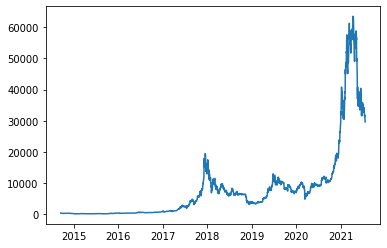

--------------------------CORRELATIONS--------------------------
----------------------PEARSON----------------------


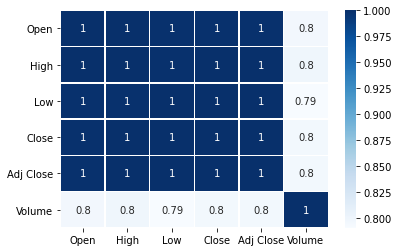

----------------------KENDALL----------------------


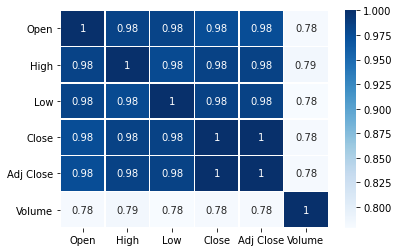

----------------------SPEARMAN----------------------


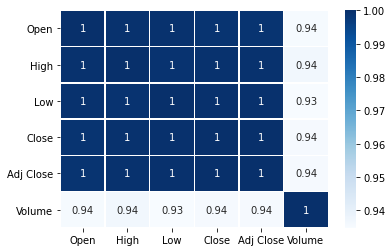

--------------------------DATA (DIFFERENCE)--------------------------
              Open         High  ...    Adj Close       Volume
count  2494.000000  2494.000000  ...  2494.000000  2494.000000
mean      0.002451     0.002294  ...     0.002451     0.053289
std       0.039071     0.035211  ...     0.039237     0.377078
min      -0.365924    -0.263712  ...    -0.371695    -0.869188
25%      -0.012624    -0.010740  ...    -0.012747    -0.141608
50%       0.001947    -0.000496  ...     0.001990    -0.009063
75%       0.017966     0.013959  ...     0.018035     0.165255
max       0.250461     0.245708  ...     0.252472     5.439003

[8 rows x 6 columns]


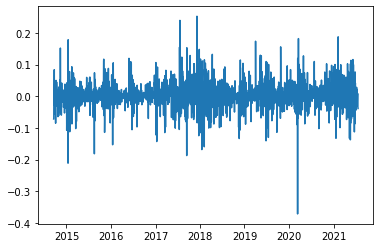

--------------------------CORRELATIONS (DIFFERENCE)--------------------------
----------------------PEARSON----------------------


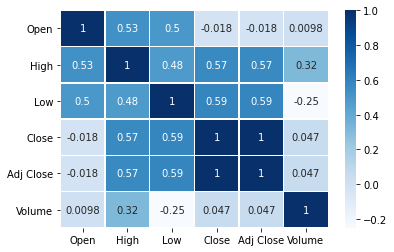

----------------------KENDALL----------------------


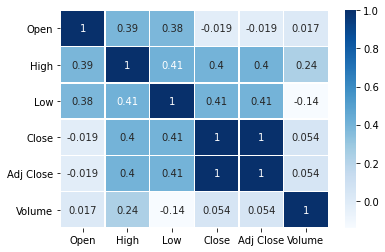

----------------------SPEARMAN----------------------


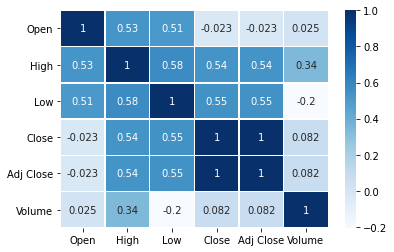

In [ ]:
#Data not used. NOTE: It's weird
#Univariate time series
print("--------------------------DATA--------------------------")
df_btc = pdr.get_data_yahoo(["BTC-USD"])
print(type(df_btc))
#print(df_adj.head(4))
print(df_btc.describe())

#plt.plot(df_btc['Open'])
plt.plot(df_btc['Close'])
#plt.plot(df_btc['High'])
#plt.plot(df_btc['Low'])
plt.show()

print("--------------------------CORRELATIONS--------------------------")
print("----------------------PEARSON----------------------")
df_pearson = df_btc.corr(method='pearson')
sns.heatmap(df_pearson,xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, 
            annot=True, cmap='Blues',linewidths=.5)
plt.show()
print("----------------------KENDALL----------------------")
df_kendall = df_btc.corr(method='kendall')
sns.heatmap(df_kendall,xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, 
            annot=True, cmap='Blues',linewidths=.5)
plt.show()
print("----------------------SPEARMAN----------------------")
df_spearman = df_btc.corr(method='spearman')
sns.heatmap(df_spearman,xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, 
            annot=True, cmap='Blues',linewidths=.5)
plt.show()
print("--------------------------DATA (DIFFERENCE)--------------------------")
df_btc_pch = df_btc.pct_change().dropna()
print(df_btc_pch.describe())
plt.plot(df_btc_pch['Close'])
plt.show()
#print(df_btc_pch.head(4))

print("--------------------------CORRELATIONS (DIFFERENCE)--------------------------")
print("----------------------PEARSON----------------------")
df_pearson = df_btc_pch.corr(method='pearson')
sns.heatmap(df_pearson,xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, 
            annot=True, cmap='Blues',linewidths=.5)
plt.show()
print("----------------------KENDALL----------------------")
df_kendall = df_btc_pch.corr(method='kendall')
sns.heatmap(df_kendall,xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, 
            annot=True, cmap='Blues',linewidths=.5)
plt.show()
print("----------------------SPEARMAN----------------------")
df_spearman = df_btc_pch.corr(method='spearman')
sns.heatmap(df_spearman,xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, 
            annot=True, cmap='Blues',linewidths=.5)
plt.show()

<a name="2series"></a>
# 2. Caso 1 - 1/2: 2 series de tiempo
- Importando los datos del precio de cierre del Bitcoin y Ethereum, visualizandolos, calculando correlaciones y haciendo pruebas de normalidad a los datos.
- Esta NO es la forma correcta de calcular las correlaciones, pues se está trabajando con las series y no con las series diferenciadas.

Volver a [Tabla de contenidos](#contents).


--------------------------DATA--------------------------
[*********************100%***********************]  2 of 2 completed
<class 'pandas.core.frame.DataFrame'>
               BTC-USD   ETH-USD
Date                            
2015-08-07  279.584991  2.772120
2015-08-08  260.997009  0.753325
2015-08-09  265.083008  0.701897
2015-08-10  264.470001  0.708448
            BTC-USD      ETH-USD
count   2171.000000  2171.000000
mean    9292.417854   394.240310
std    12571.477952   613.464028
min      210.494995     0.434829
25%      982.297516    13.848450
50%     6499.270020   199.841003
75%     9798.290039   389.500916
max    63503.457031  4168.701172
--------------------------PLOTTING DATA--------------------------


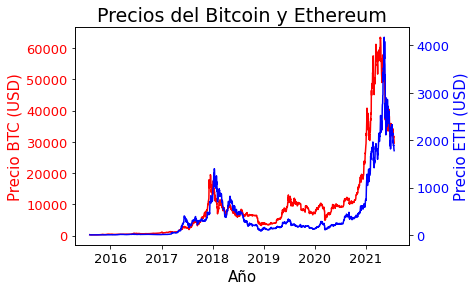

--------------------------CORRELATIONS--------------------------
Pearson correlations:
           BTC-USD   ETH-USD
BTC-USD  1.000000  0.905302
ETH-USD  0.905302  1.000000
Kendall correlations:
           BTC-USD   ETH-USD
BTC-USD  1.000000  0.720844
ETH-USD  0.720844  1.000000
Spearman correlations:
           BTC-USD   ETH-USD
BTC-USD  1.000000  0.883755
ETH-USD  0.883755  1.000000
--------------------------NORMALITY TEST--------------------------
------------- Shapiro-Wilk -------------
Shapiro-Wilk p-value for BTC-USD:  0.0
Shapiro-Wilk p-value for ETH-USD:  0.0
------------ Kolmogorov-Smirnov ------------
Kolmogorov-Smirnov p-value for BTC-USD:  0.0
Kolmogorov-Smirnov p-value for ETH-USD:  0.0


In [ ]:
#Bivariate time series
print("--------------------------DATA--------------------------")
df_adj = pdr.get_data_yahoo(["BTC-USD", "ETH-USD"]).dropna()["Adj Close"]
print(type(df_adj))
print(df_adj.head(4))
print(df_adj.describe())

print("--------------------------PLOTTING DATA--------------------------")
plot_2y_ax(x=df_adj.index, y1=df_adj["BTC-USD"], y2=df_adj["ETH-USD"], 
           title = "Precios del Bitcoin y Ethereum", 
           xlab = "Año", y1_lab = "Precio BTC (USD)", y2_lab = "Precio ETH (USD)", 
           col1 = "red", col2 = "blue", mark = "None")

print("--------------------------CORRELATIONS--------------------------")
print("Pearson correlations:\n",df_adj.corr(method='pearson'))
print("Kendall correlations:\n",df_adj.corr(method='kendall'))
print("Spearman correlations:\n",df_adj.corr(method='spearman'))

print("--------------------------NORMALITY TEST--------------------------")
print("------------- Shapiro-Wilk -------------")
staB, pvalB = stats.shapiro(df_adj["BTC-USD"])
staE, pvalE = stats.shapiro(df_adj["ETH-USD"])
print("Shapiro-Wilk p-value for BTC-USD: ",pvalB)
print("Shapiro-Wilk p-value for ETH-USD: ",pvalE)

print("------------ Kolmogorov-Smirnov ------------")
staB, pvalB = stats.kstest(df_adj["BTC-USD"],'norm')
staE, pvalE = stats.kstest(df_adj["ETH-USD"],'norm')
print("Kolmogorov-Smirnov p-value for BTC-USD: ",pvalB)
print("Kolmogorov-Smirnov p-value for ETH-USD: ",pvalE)

<a name="2dseries"></a>
# 3. Caso 1 - 2/2: 2 series diferenciadas
- Diferenciando los datos del precio de cierre del Bitcoin y Ethereum, visualizandolos, haciendo pruebas de normalidad a los datos, calculando correlaciones y haciendo un gráfico de dispersión de las diferencias.

Volver a [Tabla de contenidos](#contents).

--------------------------DATA(Diff)--------------------------
[*********************100%***********************]  2 of 2 completed
                BTC-USD    ETH-USD
Date                              
2021-07-17   111.529297  18.442261
2021-07-18   263.742188  -3.273071
2021-07-19  -978.978516 -78.255493
2021-07-21 -1217.001953 -39.632446
--------------------------PLOTTING DATA--------------------------


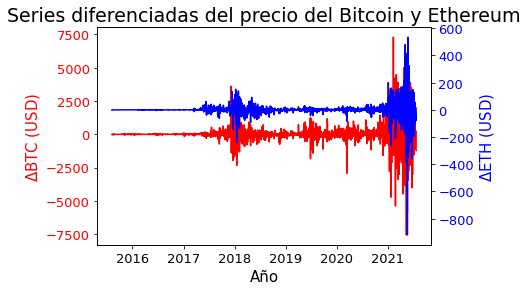

--------------------------GOODNES OF FIT--------------------------
------------- Shapiro-Wilk -------------
Shapiro-Wilk p-value for dBTC-USD:  0.0
Shapiro-Wilk p-value for dETH-USD:  0.0
------------ Kolmogorov-Smirnov ------------
Kolmogorov-Smirnov p-value for dBTC-USD:  0.0
Kolmogorov-Smirnov p-value for dETH-USD:  1.0383434437753372e-159
--------------------------CORRELATIONS--------------------------
Pearson correlations (INVALID ANALYSIS: NOT NORMAL DATA):
          BTC-USD  ETH-USD
BTC-USD  1.00000  0.66967
ETH-USD  0.66967  1.00000
Kendall correlations:
          BTC-USD  ETH-USD
BTC-USD  1.00000  0.51157
ETH-USD  0.51157  1.00000
Spearman correlations:
           BTC-USD   ETH-USD
BTC-USD  1.000000  0.647906
ETH-USD  0.647906  1.000000
--------------------------SCATTER PLOT--------------------------


(array([-10000.,  -8000.,  -6000.,  -4000.,  -2000.,      0.,   2000.,
          4000.,   6000.,   8000.,  10000.]),
 <a list of 11 Text major ticklabel objects>)

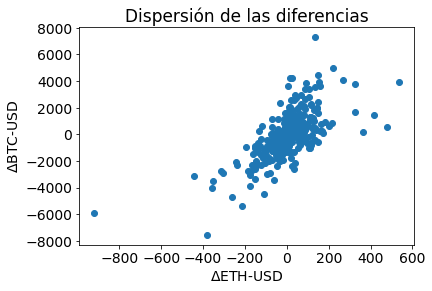

In [ ]:
print("--------------------------DATA(Diff)--------------------------")
df_adj = pdr.get_data_yahoo(["BTC-USD", "ETH-USD"]).dropna()["Adj Close"]
df_adj_d = df_adj.diff().dropna()
print(df_adj_d.tail(4))

print("--------------------------PLOTTING DATA--------------------------")
plot_2y_ax(x=df_adj_d.index, y1=df_adj_d["BTC-USD"], y2=df_adj_d["ETH-USD"], 
           title = "Series diferenciadas del precio del Bitcoin y Ethereum", 
           xlab = "Año", y1_lab = "$\Delta$BTC (USD)", y2_lab = "$\Delta$ETH (USD)", 
           col1 = "red", col2 = "blue", mark = "None")

print("--------------------------GOODNES OF FIT--------------------------")
print("------------- Shapiro-Wilk -------------")
staB, pvalB = stats.shapiro(df_adj_d["BTC-USD"])
staE, pvalE = stats.shapiro(df_adj_d["ETH-USD"])
print("Shapiro-Wilk p-value for dBTC-USD: ",pvalB)
print("Shapiro-Wilk p-value for dETH-USD: ",pvalE)

print("------------ Kolmogorov-Smirnov ------------")
staB, pvalB = stats.kstest(df_adj_d["BTC-USD"],'norm')
staE, pvalE = stats.kstest(df_adj_d["ETH-USD"],'norm')
print("Kolmogorov-Smirnov p-value for dBTC-USD: ",pvalB)
print("Kolmogorov-Smirnov p-value for dETH-USD: ",pvalE)

print("--------------------------CORRELATIONS--------------------------")
print("Pearson correlations (INVALID ANALYSIS: NOT NORMAL DATA):\n",df_adj_d.corr(method='pearson'))
print("Kendall correlations:\n",df_adj_d.corr(method='kendall'))
print("Spearman correlations:\n",df_adj_d.corr(method='spearman'))

print("--------------------------SCATTER PLOT--------------------------")
plt.scatter(df_adj_d["ETH-USD"], df_adj_d["BTC-USD"])
plt.title("Dispersión de las diferencias", size = 17)
plt.xlabel("$\Delta$ETH-USD", size = 14)
plt.ylabel("$\Delta$BTC-USD", size = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

<a name="ExpDiff"></a>
# Experimento: Evaluando sucesivas diferencias en las series de tiempo
Volver a [Tabla de contenidos](#contents).

--------------------------DATA--------------------------
                BTC-USD    ETH-USD
Date                              
2021-07-17   111.529297  18.442261
2021-07-18   263.742188  -3.273071
2021-07-19  -978.978516 -78.255493
2021-07-21 -1217.001953 -39.632446
--------------------------PLOTTING DATA--------------------------


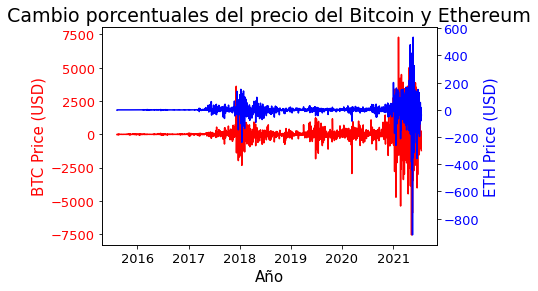

--------------------------GOODNES OF FIT--------------------------
------------- Shapiro-Wilk -------------
Shapiro-Wilk p-value for BTC-USD:  0.0
Shapiro-Wilk p-value for ETH-USD:  0.0
------------ Kolmogorov-Smirnov ------------
Kolmogorov-Smirnov p-value for BTC-USD:  0.0
Kolmogorov-Smirnov p-value for ETH-USD:  2.4314514148815356e-227
--------------------------CORRELATIONS--------------------------
Pearson correlations:
           BTC-USD   ETH-USD
BTC-USD  1.000000  0.712921
ETH-USD  0.712921  1.000000
Kendall correlations:
          BTC-USD  ETH-USD
BTC-USD  1.00000  0.54243
ETH-USD  0.54243  1.00000
Spearman correlations:
           BTC-USD   ETH-USD
BTC-USD  1.000000  0.674891
ETH-USD  0.674891  1.000000
--------------------------SCATTER PLOT--------------------------


(array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]),
 <a list of 7 Text major ticklabel objects>)

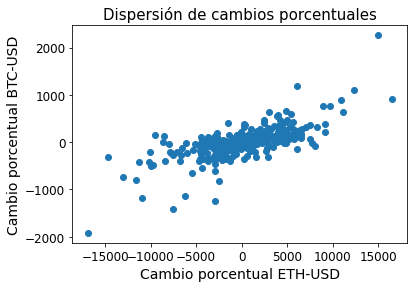

In [ ]:
print("--------------------------DATA--------------------------")
df_adj_pch = df_adj.diff().dropna()
df_adj_pch2 = df_adj_pch.diff().dropna()
df_adj_pch2 = df_adj_pch2.diff().dropna()
print(df_adj_pch.tail(4))

print("--------------------------PLOTTING DATA--------------------------")
plot_2y_ax(x=df_adj_pch.index, y1=df_adj_pch["BTC-USD"], y2=df_adj_pch["ETH-USD"], 
           title = "Cambio porcentuales del precio del Bitcoin y Ethereum", 
           xlab = "Año", y1_lab = "BTC Price (USD)", y2_lab = "ETH Price (USD)", 
           col1 = "red", col2 = "blue", mark = "None")

print("--------------------------GOODNES OF FIT--------------------------")
print("------------- Shapiro-Wilk -------------")
#plt.hist(df_adj.diff().dropna()["BTC-USD"])
#df_adj_pch = df_adj.diff().dropna()
#plt.show()
staB, pvalB = stats.shapiro(df_adj_pch2["BTC-USD"])
staE, pvalE = stats.shapiro(df_adj_pch2["ETH-USD"])
print("Shapiro-Wilk p-value for BTC-USD: ",pvalB)
print("Shapiro-Wilk p-value for ETH-USD: ",pvalE)

print("------------ Kolmogorov-Smirnov ------------")
staB, pvalB = stats.kstest(df_adj_pch2["BTC-USD"],'norm')
staE, pvalE = stats.kstest(df_adj_pch2["ETH-USD"],'norm')
print("Kolmogorov-Smirnov p-value for BTC-USD: ",pvalB)
print("Kolmogorov-Smirnov p-value for ETH-USD: ",pvalE)

print("--------------------------CORRELATIONS--------------------------")
print("Pearson correlations:\n",df_adj_pch2.corr(method='pearson'))
print("Kendall correlations:\n",df_adj_pch2.corr(method='kendall'))
print("Spearman correlations:\n",df_adj_pch2.corr(method='spearman'))

print("--------------------------SCATTER PLOT--------------------------")
plt.scatter(df_adj_pch2["BTC-USD"], df_adj_pch2["ETH-USD"])
plt.title("Dispersión de cambios porcentuales", size = 15)
plt.xlabel("Cambio porcentual ETH-USD", size = 14)
plt.ylabel("Cambio porcentual BTC-USD", size = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

<a name="4series"></a>
# 4. Caso 2: 4 series de tiempo
Mapa de calor de las correlaciones entre las series diferencias.

Datos:
- 3 criptomonedas.
- 1 índice.

Volver a [Tabla de contenidos](#contents).

--------------------------DATA--------------------------
[*********************100%***********************]  4 of 4 completed
            BTC-USD      ETH-USD     USDT-USD        ^GSPC
count   1493.000000  1493.000000  1493.000000  1493.000000
mean    9266.086347   393.336920     1.000843  2762.835297
std    12568.891359   615.754548     0.008951   590.866450
min      210.494995     0.434829     0.913595  1829.079956
25%      989.023010    13.846700     1.000000  2280.899902
50%     6502.589844   200.767242     1.000137  2722.459961
75%     9771.489258   387.740997     1.002509  3019.560059
max    63503.457031  4168.701172     1.077880  4384.629883
--------------------------CORRELATIONS (DIFF)--------------------------


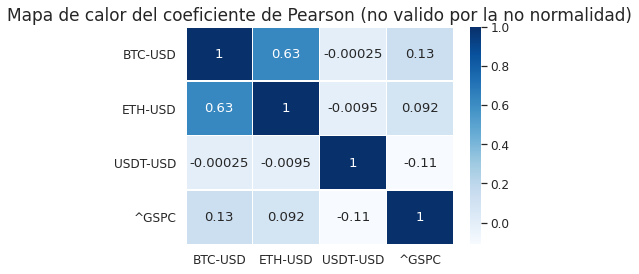

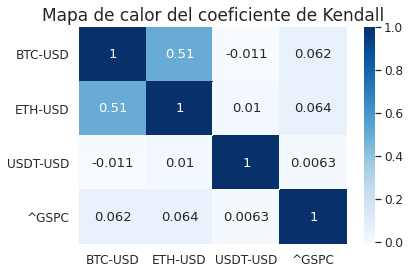

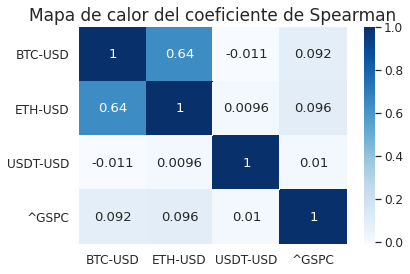

In [ ]:
#Bivariate time series
print("--------------------------DATA--------------------------")
from pandas.core.common import flatten
CRYPTO = ["BTC-USD","ETH-USD","USDT-USD"]
STOCKS = ["^GSPC"]
DATASET =[CRYPTO,STOCKS]
#print(list(flatten(DATASET)))
df_adj_4 = pdr.get_data_yahoo(list(flatten(DATASET))).dropna()["Adj Close"]
#print(type(df_adj_4))
#print(df_adj_4.head(4))
print(df_adj_4.describe())
#----- Differentiating
df_adj_4_d = df_adj_4.diff().dropna()
#print(df_adj_4_d.head(4))

print("--------------------------CORRELATIONS (DIFF)--------------------------")
plt.title("Mapa de calor del coeficiente de Pearson (no valido por la no normalidad)", size=17)
df_pearson = df_adj_4_d.corr(method='pearson')
#print("Pearson correlations:\n",df_pearson)
sns.heatmap(df_pearson,
            xticklabels=df_pearson.columns, yticklabels=df_pearson.columns, annot=True, cmap='Blues',
            linewidths=.5)
#plt.yticks(rotation=0)
plt.show()
plt.title("Mapa de calor del coeficiente de Kendall", size=17)
df_kendall = df_adj_4_d.corr(method='kendall')
#print("Kendall correlations:\n",df_kendall)
sns.heatmap(df_kendall,
            xticklabels=df_kendall.columns, yticklabels=df_kendall.columns, annot=True, cmap='Blues')
plt.show()
plt.title("Mapa de calor del coeficiente de Spearman", size=17)
df_spearman = df_adj_4_d.corr(method='spearman')
#print("Spearman correlations:\n",df_spearman)
sns.heatmap(df_spearman,
            xticklabels=df_spearman.columns, yticklabels=df_spearman.columns, annot=True, cmap='Blues')
plt.show()


<a name="Nseries"></a>
# 5. Caso 3: n series de tiempo
Importando los datos, que corresponden a:
- 3 criptomonedas.
- 10 accciones.
- 1 ETF.
- 10 Futuros.
- 10 índices
- 10 divisas.

Volver a [Tabla de contenidos](#contents).

In [ ]:
%%time
#Multivariate time series
print("--------------------------DATA--------------------------")
from pandas.core.common import flatten
CRYPTO = ["BTC-USD","ETH-USD","USDT-USD"]
#print(len(CRYPTO))7-data2D
STOCKS = ["AMC","AAPL","CLNE","TSLA","SYKE","ZHUZF","ANPDF","MVIS","SSL","BGCP"]#4 most actives 3 gainers 3 losers
ETFS = ["QQQ"]
FUTS = ["ES=F","YM=F","NQ=F","ZB=F","ZN=F","ZF=F","ZT=F","GC=F","MGC=F","SI=F"]
INDICES = ["^GSPC","^DJI","^IXIC","^NYA","^XAX","^RUT","^VIX","^AXJO","^AORD"]
CURRENCIES = ["EURUSD=X","JPY=X","GBPUSD=X","AUDUSD=X","NZDUSD=X","EURJPY=X","GBPJPY=X","EURGBP=X","EURCAD=X","EURSEK=X"]
#1408(6)
#COMMODITIES = []
DATASET =[CRYPTO,STOCKS,ETFS,FUTS,INDICES,CURRENCIES]#,COMMODITIES]
##print(list(flatten(DATASET)))
df_adj_lot = pdr.get_data_yahoo(list(flatten(DATASET))).dropna()["Adj Close"]
#print(type(df_adj_lot))
#print(df_adj_lot.head(4))
#print(df_adj_lot.tail(4))
print(df_adj_lot.describe())

--------------------------DATA--------------------------
[*********************100%***********************]  43 of 43 completed
             AAPL         AMC       ANPDF  ...         ^RUT        ^VIX         ^XAX
count  117.000000  117.000000  117.000000  ...   117.000000  117.000000   117.000000
mean    64.583712   12.944602    7.753058  ...  1638.662479   18.136410  2530.081193
std     32.240402    8.351217    4.623767  ...   253.710400    6.530497   254.332885
min     22.822144    2.010000    1.809840  ...  1052.050049    9.400000  1520.310059
25%     45.759750    9.082216    4.602314  ...  1522.229980   13.500000  2440.610107
50%     50.926807   12.708704    6.392103  ...  1566.569946   15.960000  2547.139893
75%     66.369415   14.429327    8.993914  ...  1695.359985   21.100000  2647.919922
max    142.464767   59.259998   22.950001  ...  2314.689941   46.799999  3309.850098

[8 rows x 43 columns]
CPU times: user 6.06 s, sys: 291 ms, total: 6.35 s
Wall time: 8.88 s


## Análisis
- Definiendo las series diferenciadas y echándoles un vistazo.
- Mapa de calor de las correlaciones entre las series diferencias.


--------------------------DATA (DIFF)--------------------------
                 AAPL        AMC     ANPDF  ...        ^RUT      ^VIX        ^XAX
Date                                        ...                                  
2016-06-02  -0.042038   0.406530 -0.271476  ...   35.269897 -0.790000  -12.290039
2017-11-06  18.815479 -12.513377  2.545804  ...  327.380005 -4.230000  344.820068
2017-11-07   0.133812   0.080344  0.000000  ...  -18.869995  0.490001  -19.880127
2017-12-19   0.085419   2.544570 -0.354196  ...   57.660034  0.139999  -52.429932

[4 rows x 43 columns]
--------------------------CORRELATIONS--------------------------


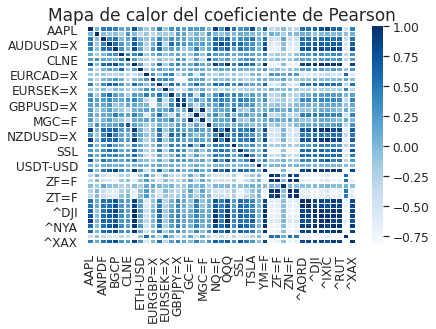

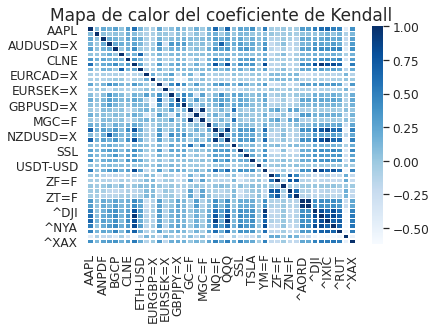

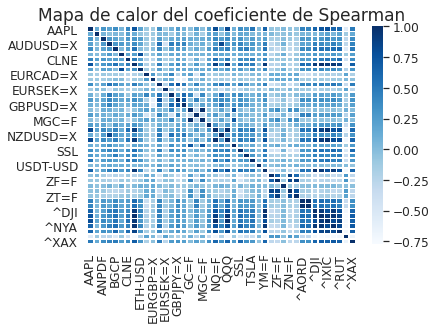

In [ ]:
print("--------------------------DATA (DIFF)--------------------------")
df_adj_lot_d = df_adj_lot.diff().dropna()
print(df_adj_lot_d.head(4))

print("--------------------------CORRELATIONS--------------------------")
plt.title("Mapa de calor del coeficiente de Pearson", size=17)
df_pearson = df_adj_lot_d.corr(method='pearson')
#print("Pearson correlations:\n",df_pearson)
sns.heatmap(df_pearson,cmap='Blues',linewidths=.5)
plt.show()
plt.title("Mapa de calor del coeficiente de Kendall", size=17)
df_kendall = df_adj_lot_d.corr(method='kendall')
#print("Kendall correlations:\n",df_kendall)
sns.heatmap(df_kendall,cmap='Blues',linewidths=.5)
plt.show()
plt.title("Mapa de calor del coeficiente de Spearman", size=17)
df_spearman = df_adj_lot_d.corr(method='spearman')
#print("Spearman correlations:\n",df_spearman)
sns.heatmap(df_spearman,cmap='Blues',linewidths=.5)

<a name="Filter"></a>
# 6. Filtrado por correlacion

Volver a [Tabla de contenidos](#contents).


In [ ]:
#print(type(df_kendall["BTC-USD"]))
#print(df_kendall["BTC-USD"][:10])
#print(type(df_kendall))
CORR = 0.5
print("--------------------------Pearson--------------------------")
print(df_pearson[df_pearson["BTC-USD"] > CORR]["BTC-USD"])
print("--------------------------Kendall--------------------------")
print(df_kendall[df_kendall["BTC-USD"] > CORR]["BTC-USD"])
print("--------------------------Spearman--------------------------")
print(df_spearman[df_spearman["BTC-USD"] > CORR]["BTC-USD"])

CORR_NEG = -0.0
print("--------------------------Pearson--------------------------")
print(df_pearson[df_pearson["BTC-USD"] < CORR_NEG]["BTC-USD"])
print("--------------------------Kendall--------------------------")
print(df_kendall[df_kendall["BTC-USD"] < CORR_NEG]["BTC-USD"])
print("--------------------------Spearman--------------------------")
print(df_spearman[df_spearman["BTC-USD"] < CORR_NEG]["BTC-USD"])

--------------------------Pearson--------------------------
BTC-USD    1.000000
ETH-USD    0.590366
Name: BTC-USD, dtype: float64
--------------------------Kendall--------------------------
BTC-USD    1.000000
ETH-USD    0.673463
Name: BTC-USD, dtype: float64
--------------------------Spearman--------------------------
BTC-USD    1.000000
ETH-USD    0.799054
Name: BTC-USD, dtype: float64
--------------------------Pearson--------------------------
AMC        -0.213458
ANPDF      -0.003039
EURCAD=X   -0.177760
EURSEK=X   -0.091040
GBPUSD=X   -0.013184
GC=F       -0.116252
MGC=F      -0.114615
ZB=F       -0.279300
ZF=F       -0.138285
ZHUZF      -0.217390
ZN=F       -0.227065
ZT=F       -0.087290
^VIX       -0.312142
Name: BTC-USD, dtype: float64
--------------------------Kendall--------------------------
EURCAD=X   -0.115901
EURGBP=X   -0.007197
EURSEK=X   -0.088756
ZB=F       -0.186876
ZF=F       -0.065246
ZN=F       -0.174209
ZT=F       -0.068301
^VIX       -0.067187
Name: BTC-USD, dty

<a name="Conclu"></a>
#Conclusiones
1. Hallar correlaciones de la series de tiempo sin diferenciarlas puede hacer ver una relación espúria entre magnitudes.
2. Como trabajo posterior se sugiere aplicar otros métodos para hallar correlaciones en series de tiempo.
3. De todos los 44 activos financieros estudiados el único que tiene una correlación significativa (definida como mayor que 0.5) con el Bitcoin es la criptomoneda del Ethereum. 
4. La correlación de Pearson es bastante similar a la de Spearman y Kendall a pesar de que las magnitudes estudiadas no tengan una distribución normal (valor p casi cero en las pruebas de Kolmogorov-Smirnov y Shapiro-Wilk).

Volver a [Tabla de contenidos](#contents).



## Bibliografía
1. [Python Tutorial: Correlation of Two Time Series (2m 31s) - Coeficiente de Pearson para 2 series de tiempo](https://www.youtube.com/watch?v=XVV6IVPUlKU)

2. [How To Use Python To Analyze Cryptocurrencies - Mapa de calor de correlaciones](https://medium.com/@mentormelv/how-to-use-python-to-analyze-cryptocurrencies-c5b9601ee0bb)

3. [ - Uso de la función "cov"](https://www.geeksforgeeks.org/python-pandas-dataframe-cov/)

4. [Uso de la función "corr" (tiene los coeff incluídos)](https://www.geeksforgeeks.org/python-pandas-dataframe-corr)

5. [Curso de series de tiempo en Python (se habla de correlación)](https://learn.datacamp.com/courses/introduction-to-time-series-analysis-in-python#)

6. [Four ways to quantify synchrony between time series data (métodos no conocidos)](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

7. [The Easy Way to Compute and Visualize the Time & Frequency Correlation (usa "cross correlation")](https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0)

8. [Import a lot of data using lists](https://stackoverflow.com/questions/59674019/getting-data-about-stocks-using-datareader)

9. [Yahoo Finance (ver distintos mercados)](https://finance.yahoo.com/cryptocurrencies)

10. [Python Correlation – A Practical Guide (algotrading)](https://algotrading101.com/learn/python-correlation-guide/)

11. [GitHub: Python Correlation - A Practical Guide - AlgoTrading101 Blog](https://github.com/PythonForForex/Python-Correlation-and-Relationships-Guide)

12. [Fuente de correlaciones espúreas: tylervigen.com/discover](https://tylervigen.com/discover)

13. [Artículo: Detecting correlation changes in multivariate time series](https://link.springer.com/content/pdf/10.3758/s13428-016-0754-9.pdf)

14. [Artículo: A Review on Nonparametric Time Series Analysis](https://www.jstor.org/stable/1403432?seq=1)

15. [Artículo: Chapter 23 Nonparametric Tests for Trend Detection](https://www.sciencedirect.com/science/article/pii/S0167564808706889)

16. [Post: Correlation with prices or returns: that is the question](https://quantdare.com/correlation-prices-returns/)

17. [Artículo: Correlation, regression, and cointegration of nonstationary economic time series](http://web.math.ku.dk/~sjo/papers/LisbonPaper.pdf)

18. [Buen Artículo Web: Finding correlations in time series data](https://erdem.pl/2020/06/finding-correlations-in-time-series-data)

# BIB: Paralelización de RNN

https://www.tensorflow.org/api_docs/python/tf/compat/v1/nn/rnn_cell/MultiRNNCell

https://www.tensorflow.org/api_docs/python/tf/compat/v1/nn/rnn_cell/MultiRNNCell?hl=es

https://stackoverflow.com/questions/51219354/cant-train-keras-model-with-dask

https://stackoverflow.com/questions/47762902/how-to-speed-up-the-training-of-an-rnn-model-with-multiple-gpus-in-tensorflow?noredirect=1&lq=1

https://stackoverflow.com/questions/47530023/data-parallelism-for-rnn-in-tensorflow

https://stackoverflow.com/questions/39208564/is-there-a-way-to-parallelize-stacked-rnns-over-multiple-gpus-in-tensorflow

